<h1 style='font-size: 45px; color: crimson; font-family: Dalton White; font-weight: 600; text-align: center'>Tukeys Honest Significant Difference | Comparing Group Differences</h1>

---

<h2 style='font-family: Dalton White; font-weight: 600; font-size: 30px; text-align: left'> 1.0. Import Required Libraries</h2>

In [12]:
# Data Manipulation & Utilities
import numpy as np
import pandas as pd
import string
import math
import re

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats
from scipy.stats import shapiro, levene, skew, kurtosis, gaussian_kde

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Configuration & Settings
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 10)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("\n----- Libraries Loaded Successfully -----\n")


----- Libraries Loaded Successfully -----



<h2 style='font-family: Dalton White; font-weight: 600; font-size: 30px; text-align: left'>2.0. Load and Inspect Dataset</h2>

In [2]:
filepath = "./Datasets/Fertilizer and Light Exposure Experiment Dataset.csv"
df = pd.read_csv(filepath)
display(df)

,Fertilizer,Light Exposure,Plant Height (cm),Leaf Area (cm²),...,Biomass (g),Flower Count (number),Seed Yield (g),Stomatal Conductance (mmol/m²/s)
0,Control,Full Sun,58.56,185.74,...,11.99,19.54,6.69,242.41
1,Organic,Full Shade,46.70,138.80,...,8.67,15.37,6.17,233.66
2,Control,Partial Shade,58.33,203.84,...,9.50,16.39,5.41,230.07
3,Control,Full Shade,42.73,140.47,...,10.35,12.45,4.26,154.25
4,Organic,Full Shade,41.82,129.78,...,10.55,15.14,4.64,200.54
...,...,...,...,...,...,...,...,...,...
115,Synthetic,Partial Shade,65.24,228.35,...,10.94,21.14,7.48,254.78
116,Organic,Partial Shade,63.56,179.53,...,10.47,16.11,6.17,234.22
117,Control,Partial Shade,62.75,180.21,...,12.41,17.99,6.18,278.97
118,Control,Full Shade,39.60,144.32,...,9.15,13.72,4.46,186.87


<h2 style='font-family: Dalton White; font-size: 30px; font-weight: 600'>3.0: Dataset Informartion Overviews</h2>

<h4 style='font-family: Dalton White; font-size: 20px; font-weight: 600'> 3.1: Dataset Shape and Columns</h4>

In [14]:
nrows, ncols = df.shape
print(f"Dataset has {nrows} entries and {ncols} columns")

Dataset has 120 entries and 10 columns


In [15]:
for i, column in enumerate(df.columns.tolist()): print(f"{'-'*5} {i}: {column}")

----- 0: Fertilizer
----- 1: Light Exposure
----- 2: Plant Height (cm)
----- 3: Leaf Area (cm²)
----- 4: Chlorophyll Content (SPAD units)
----- 5: Root Length (cm)
----- 6: Biomass (g)
----- 7: Flower Count (number)
----- 8: Seed Yield (g)
----- 9: Stomatal Conductance (mmol/m²/s)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fertilizer                        120 non-null    object 
 1   Light Exposure                    120 non-null    object 
 2   Plant Height (cm)                 120 non-null    float64
 3   Leaf Area (cm²)                   120 non-null    float64
 4   Chlorophyll Content (SPAD units)  120 non-null    float64
 5   Root Length (cm)                  120 non-null    float64
 6   Biomass (g)                       120 non-null    float64
 7   Flower Count (number)             120 non-null    float64
 8   Seed Yield (g)                    120 non-null    float64
 9   Stomatal Conductance (mmol/m²/s)  120 non-null    float64
dtypes: float64(8), object(2)
memory usage: 9.5+ KB


<h4 style=' font-family: Dalton White; font-size: 25px; font-weight: 600'>3.2: Columns Profiling</h4>

In [13]:
def column_summaries(df: pd.DataFrame) -> pd.DataFrame:
    summary_data = []
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summaries(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Fertilizer,object,0,120,3,"{'Control': 41, 'Synthetic': 40, 'Organic': 39}"
1,Light Exposure,object,0,120,3,"{'Full Shade': 44, 'Full Sun': 40, 'Partial Sh..."
2,Plant Height (cm),float64,0,120,120,"{58.56151388665052: 1, 46.696826238466286: 1, ..."
3,Leaf Area (cm²),float64,0,120,120,"{185.73856643236132: 1, 138.7980608962804: 1, ..."
4,Chlorophyll Content (SPAD units),float64,0,120,120,"{46.5196207922374: 1, 34.69363266870892: 1, 40..."
5,Root Length (cm),float64,0,120,120,"{24.31891050096943: 1, 17.6585349528435: 1, 26..."
6,Biomass (g),float64,0,120,120,"{11.994074041165357: 1, 8.667791843721698: 1, ..."
7,Flower Count (number),float64,0,120,120,"{19.53594616947752: 1, 15.366158832462084: 1, ..."
8,Seed Yield (g),float64,0,120,120,"{6.687959618540082: 1, 6.165373569255893: 1, 5..."
9,Stomatal Conductance (mmol/m²/s),float64,0,120,120,"{242.41380014645895: 1, 233.65862057163417: 1,..."


<h4 style='font-family: Dalton White;  font-size: 25px; font-weight: 600'>3.3: Exploring Invalid Entries Dtypes</h4>

In [9]:
def simplify_dtype(dtype):
    if dtype in (int, float, np.number): return 'Numeric'
    elif np.issubdtype(dtype, np.datetime64): return 'Datetime'
    elif dtype == str: return 'String'
    elif dtype == type(None): return 'Missing'
    else: return 'Other'

def analyze_column_dtypes(df):
    all_dtypes = {'Numeric', 'Datetime', 'String', 'Missing', 'Other'}
    results = pd.DataFrame(index=df.columns, columns=list(all_dtypes), dtype=object).fillna('-')
    
    for column in df.columns:
        dtypes = df[column].apply(lambda x: simplify_dtype(type(x))).value_counts()
        percentages = (dtypes / len(df)) * 100
        for dtype, percent in percentages.items():
            if percent > 0:
                results.at[column, dtype] = f'{percent:.2f}%'
            else:
                results.at[column, dtype] = '-'
    return results

results = analyze_column_dtypes(df)
display(results)

,Numeric,Missing,Other,String,Datetime
Fertilizer,-,-,-,100.00%,-
Light Exposure,-,-,-,100.00%,-
Plant Height (cm),100.00%,-,-,-,-
Leaf Area (cm²),100.00%,-,-,-,-
Chlorophyll Content (SPAD units),100.00%,-,-,-,-
Root Length (cm),100.00%,-,-,-,-
Biomass (g),100.00%,-,-,-,-
Flower Count (number),100.00%,-,-,-,-
Seed Yield (g),100.00%,-,-,-,-
Stomatal Conductance (mmol/m²/s),100.00%,-,-,-,-


<h4 style=' font-family: Dalton White;  font-size: 25px;  font-weight: 600'>3.4: Handling Duplicates Values</h4>

In [10]:
def handling_duplicates(df):
    Duplicates = df.duplicated().sum()
    if Duplicates != 0:
        df.drop_duplicates(inplace=True)
        return 
        print(f'Dataset has {Duplicates} Duplicates and values was cleaned successifully')
    else:
        print('Dataset has no Duplictes values')
handling_duplicates(df)

Dataset has no Duplictes values


<h4 style='font-size: 25px; font-family: Dalton White; font-weight: 600'>3.5: Checking Missing Values</h4>

In [11]:
def missig_values_info(df):   
    isna_df = df.isna().sum().reset_index(name='Missing Values Counts')
    isna_df['Proportions (%)'] = isna_df['Missing Values Counts']/len(df)*100
    return isna_df
    
isna_df = missig_values_info(df)
isna_df

,index,Missing Values Counts,Proportions (%)
0,Fertilizer,0,0.00
1,Light Exposure,0,0.00
2,Plant Height (cm),0,0.00
3,Leaf Area (cm²),0,0.00
4,Chlorophyll Content (SPAD units),0,0.00
5,Root Length (cm),0,0.00
6,Biomass (g),0,0.00
7,Flower Count (number),0,0.00
8,Seed Yield (g),0,0.00
9,Stomatal Conductance (mmol/m²/s),0,0.00


<h1 style='font-family: Dalton White; font-size: 25px;  font-weight: 600''>4.0: Outliers Detection and Handling</h1>

<h4 style='font-family: Dalton White; font-size: 20px;  font-weight: 600'>4.1: Interquartile Range (IQR) Method</h4>

In [18]:
def interquartile_range_outlier(df: pd.DataFrame, numeric_cols: list =None, group: str = None) -> pd.DataFrame:
    if group: grouped = df.groupby(group)
    else: grouped = [(None, df)]
        
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
        if group in numeric_cols:
            numeric_cols.remove(group)
            

    results = []
    for group_name, group_df in grouped:    
        for col in numeric_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            count = df[(df[col] < lower) | (df[col] > upper)].shape[0]

            results.append({
                f'{group}': group_name,
                'Variable': col,
                'Counts': count,
                'Total Observations': len(group_df),
                'Proportion (%)': round((count / len(group_df)) * 100, 2),
            })
    results = pd.DataFrame(results)
    if group is None: results = results.drop(columns=[f'{group}'])        
    return results


# Interquartile Range (IQR) Method at Overall
results = interquartile_range_outlier(df)
display(results)

,Variable,Counts,Total Observations,Proportion (%)
0,Plant Height (cm),0,120,0.00
1,Leaf Area (cm²),1,120,0.83
2,Chlorophyll Content (SPAD units),1,120,0.83
3,Root Length (cm),1,120,0.83
4,Biomass (g),0,120,0.00
5,Flower Count (number),0,120,0.00
6,Seed Yield (g),1,120,0.83
7,Stomatal Conductance (mmol/m²/s),0,120,0.00


In [20]:
# Interquartile Range (IQR) Method at Group Level
results = interquartile_range_outlier(df, group='Fertilizer')
display(results)

,Fertilizer,Variable,Counts,Total Observations,Proportion (%)
0,Control,Plant Height (cm),0,41,0.00
1,Control,Leaf Area (cm²),1,41,2.44
2,Control,Chlorophyll Content (SPAD units),1,41,2.44
3,Control,Root Length (cm),1,41,2.44
4,Control,Biomass (g),0,41,0.00
5,Control,Flower Count (number),0,41,0.00
6,Control,Seed Yield (g),1,41,2.44
7,Control,Stomatal Conductance (mmol/m²/s),0,41,0.00
8,Organic,Plant Height (cm),0,39,0.00
9,Organic,Leaf Area (cm²),1,39,2.56


<h4 style='font-family: Dalton White; font-size: 20px;  font-weight: 600'>4.2: Outlier Detection Through Boxplots</h4>

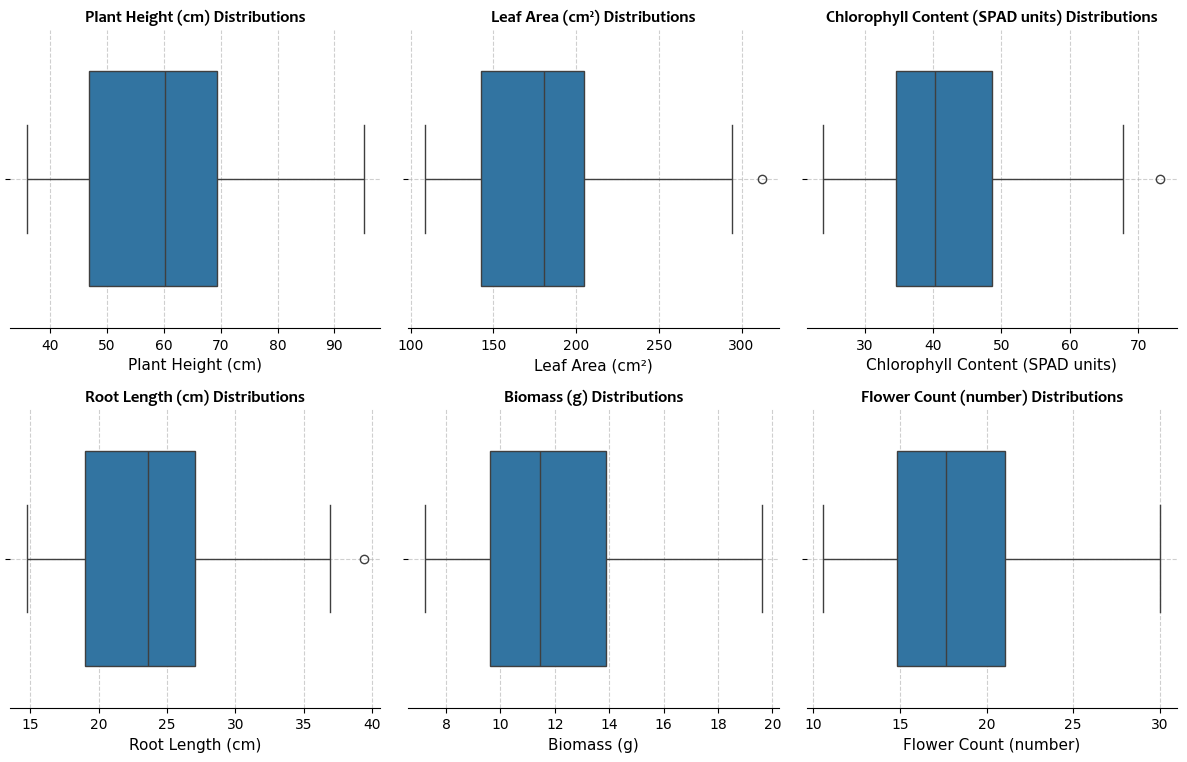

In [21]:
def visualize_boxplots(df: pd.DataFrame, group: str = None, num_cols: list=None):
    if num_cols is None:
        num_cols = df.select_dtypes(include=['number']).columns.tolist()[:6]
        if group in num_cols:
            num_cols.remove(group)
        
    num_variables = len(num_cols)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
    plt.rcParams.update({'font.family': 'Calibri', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(num_cols):
        if group is not None:
            sns.boxplot(data=df, x=df[column], fill=True, gap=0.1, ax=axes[idx], hue=group, palette='RdBu_r')  
            axes[idx].set_title(f"{column} Across {group}", fontsize=12, fontweight='bold', fontfamily='Candara')
            axes[idx].legend(frameon=False)
        else :
            sns.boxplot(data=df, x=df[column], fill=True, gap=0.1, ax=axes[idx],)
            axes[idx].set_title(f"{column} Distributions", fontsize=12, fontweight='bold', fontfamily='Candara')
            
        axes[idx].spines[['right', 'left', 'top']].set_visible(False)
        axes[idx].set_xlabel(column, fontsize=11)
        axes[idx].grid(linestyle='--', alpha=0.6)
    
    for idx in range(num_variables, len(axes)): fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
    return fig

fig = visualize_boxplots(df)

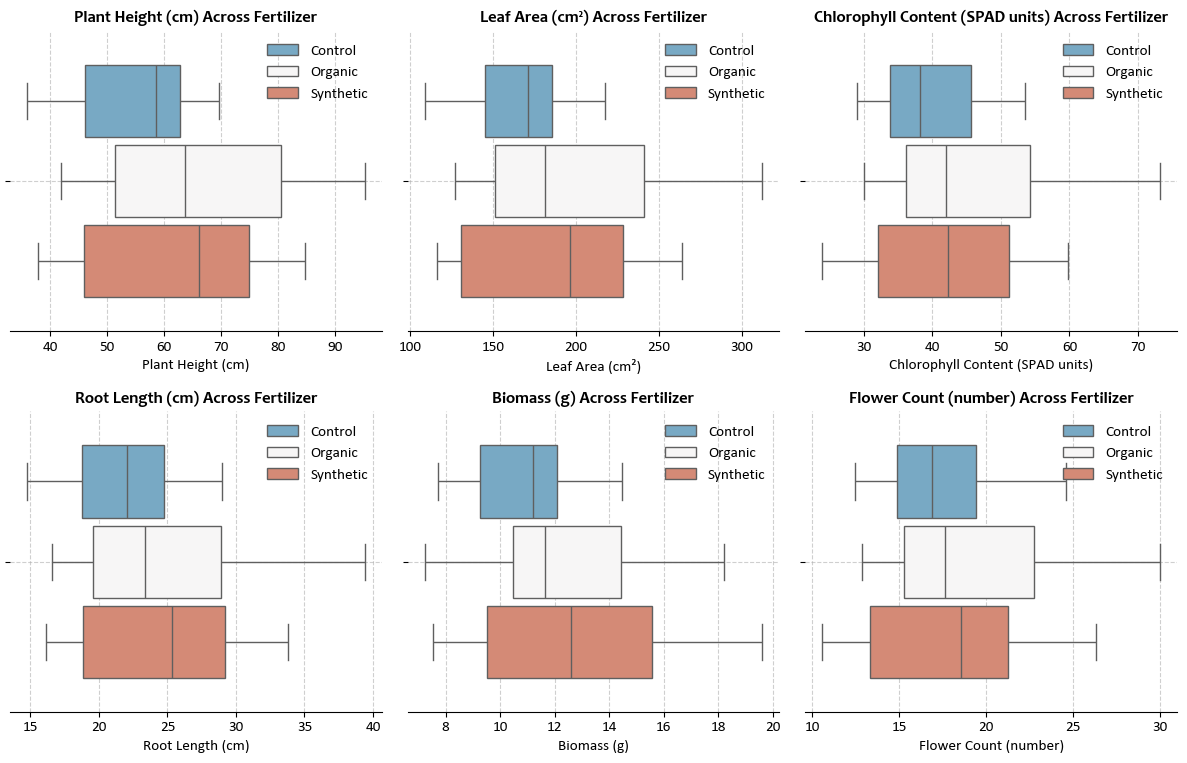

In [22]:
fig = visualize_boxplots(df, group='Fertilizer')

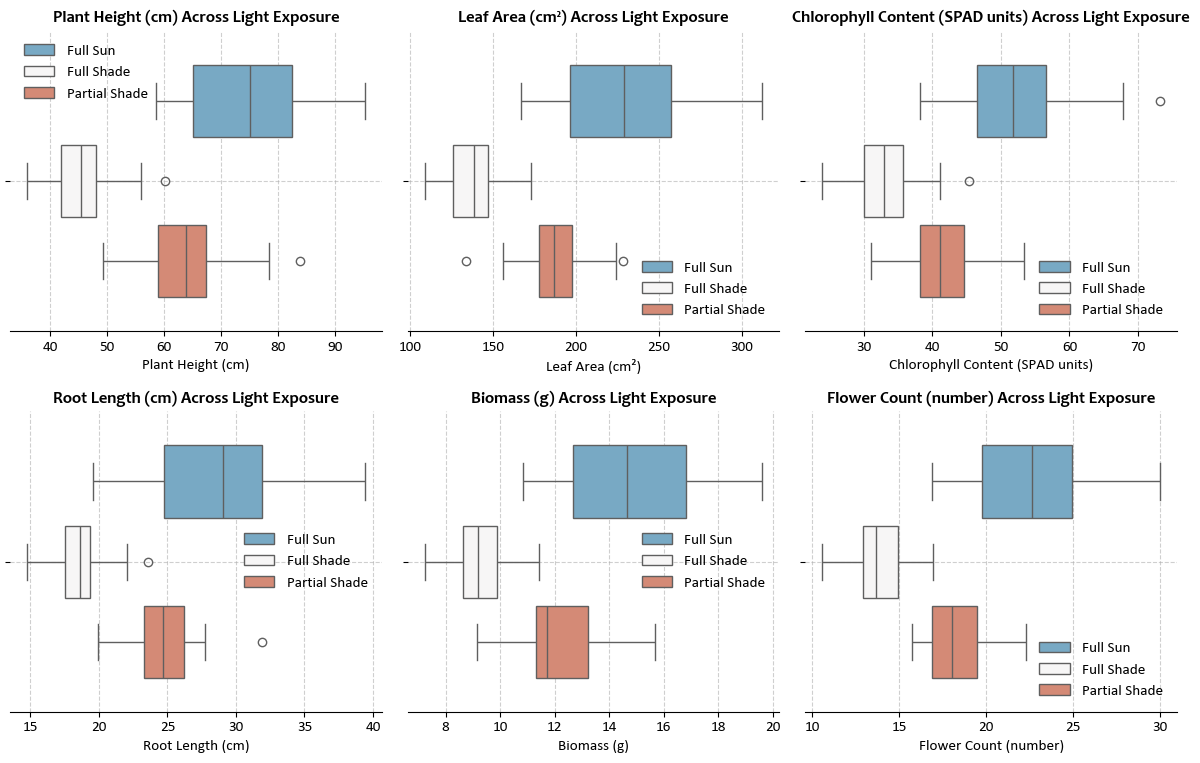

In [23]:
fig = visualize_boxplots(df, group='Light Exposure')

<h4 style='font-family: Dalton White; font-size: 20px;  font-weight: 600'>4.3: Normalizing Outliers</h4>

In [24]:
def capping_outlier_iqr(df: pd.DataFrame, group_col: str = None, num_cols: list = None, k: float = 1.5) -> pd.DataFrame:
    out = df.copy()
    if num_cols is None:
        num_cols = out.select_dtypes(include='number').columns.tolist()
        if group_col and group_col in num_cols:
            num_cols.remove(group_col)
    
    if group_col: grouped = out.groupby(group_col)
    else: grouped = [(None, out)]
    
    for grp_name, grp_df in grouped:
        for col in num_cols:
            if col not in grp_df.columns:
                continue
            q1, q3 = grp_df[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            if iqr == 0 or pd.isna(iqr):
                continue
            lo, hi = q1 - k * iqr, q3 + k * iqr
            mask = (out[group_col] == grp_name) if group_col else slice(None)
            out.loc[mask, col] = out.loc[mask, col].clip(lower=lo, upper=hi)
    
    return out

cleaned_df = df.copy()
cleaned_df = capping_outlier_iqr(cleaned_df)
results = interquartile_range_outlier(cleaned_df)
display(results)

,Variable,Counts,Total Observations,Proportion (%)
0,Plant Height (cm),0,120,0.00
1,Leaf Area (cm²),0,120,0.00
2,Chlorophyll Content (SPAD units),0,120,0.00
3,Root Length (cm),0,120,0.00
4,Biomass (g),0,120,0.00
5,Flower Count (number),0,120,0.00
6,Seed Yield (g),0,120,0.00
7,Stomatal Conductance (mmol/m²/s),0,120,0.00


<h1 style='font-family: Dalton White; font-size: 30px;  font-weight: 600''>4.0: Statistic Description of The Datasets</h1>

Let's take a moment to quickly explore some essential statistics of our dataset. By using the `describe()` function in pandas, we can generate a summary of key metrics for each numerical column in the dataset. This gives us a **bird's-eye view** of the data, helping us understand the general distribution and characteristics of the values.

In [25]:
summary_stats = df.describe().T.reset_index(names='Variable')
summary_stats

,Variable,count,mean,std,min,25%,50%,75%,max
0,Plant Height (cm),120.00,60.58,14.93,35.89,46.82,60.18,69.33,95.14
1,Leaf Area (cm²),120.00,181.90,45.93,108.65,142.32,180.71,205.00,312.30
2,Chlorophyll Content (SPAD units),120.00,42.03,9.86,23.99,34.58,40.37,48.66,73.21
3,Root Length (cm),120.00,23.86,5.44,14.75,19.01,23.64,27.07,39.40
4,Biomass (g),120.00,11.97,2.89,7.23,9.63,11.45,13.87,19.61
5,Flower Count (number),120.00,18.18,4.43,10.57,14.80,17.64,21.08,30.03
6,Seed Yield (g),120.00,6.16,1.49,3.86,4.94,6.14,7.03,10.16
7,Stomatal Conductance (mmol/m²/s),120.00,241.68,55.74,148.69,192.69,240.25,276.74,383.45


In [26]:
summary_stats = df.describe(include='all').T.reset_index(names='Variable')
summary_stats

,Variable,count,unique,top,freq,...,min,25%,50%,75%,max
0,Fertilizer,120,3,Control,41,...,NaN,NaN,NaN,NaN,NaN
1,Light Exposure,120,3,Full Shade,44,...,NaN,NaN,NaN,NaN,NaN
2,Plant Height (cm),120.00,NaN,NaN,NaN,...,35.89,46.82,60.18,69.33,95.14
3,Leaf Area (cm²),120.00,NaN,NaN,NaN,...,108.65,142.32,180.71,205.00,312.30
4,Chlorophyll Content (SPAD units),120.00,NaN,NaN,NaN,...,23.99,34.58,40.37,48.66,73.21
5,Root Length (cm),120.00,NaN,NaN,NaN,...,14.75,19.01,23.64,27.07,39.40
6,Biomass (g),120.00,NaN,NaN,NaN,...,7.23,9.63,11.45,13.87,19.61
7,Flower Count (number),120.00,NaN,NaN,NaN,...,10.57,14.80,17.64,21.08,30.03
8,Seed Yield (g),120.00,NaN,NaN,NaN,...,3.86,4.94,6.14,7.03,10.16
9,Stomatal Conductance (mmol/m²/s),120.00,NaN,NaN,NaN,...,148.69,192.69,240.25,276.74,383.45


<h4 style='font-family: Dalton White; font-size: 25px;  font-weight: 600'>5.1: Continuous Variables Summary Statics</h4>


In [27]:
def summary_statistics(df: pd.DataFrame, group: str=None) -> pd.DataFrame:
    if group: grouped = df.groupby(group)
    else: grouped = [(None, df)]

    results = []
    for group_name, group_df in grouped:
        for col in group_df.select_dtypes(include=[np.number]).columns:
            counts = len(group_df[col])
            mean = group_df[col].mean()
            median = group_df[col].median()
            mode = group_df[col].mode().iloc[0] if not group_df[col].mode().empty else np.nan
            std_dev = group_df[col].std()
            variance = group_df[col].var()
            value_range = group_df[col].max() - group_df[col].min()
            skewness_val = skew(group_df[col], nan_policy='omit')  # Skewness
            kurtosis_val = kurtosis(group_df[col], nan_policy='omit')  # Kurtosis
    
    
            results.append({
                f'{group}': group_name,
                'Variables': col,
                'Sample Size': counts,
                'Mean': mean,
                'Median': median,
                'Mode': mode,
                'Standard Deviation': std_dev,
                'Variance': variance,
                'Range': value_range,
                'Skewness': skewness_val,
                'Kurtosis': kurtosis_val
            })

    
    results = pd.DataFrame(results)
    if group is None: results = results.drop(columns=[f'{group}'])
    return results

results = summary_statistics(df)
results

,Variables,Sample Size,Mean,Median,Mode,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,Plant Height (cm),120,60.58,60.18,35.89,14.93,222.90,59.26,0.37,-0.73
1,Leaf Area (cm²),120,181.90,180.71,108.65,45.93,2109.99,203.66,0.56,-0.32
2,Chlorophyll Content (SPAD units),120,42.03,40.37,23.99,9.86,97.29,49.22,0.59,-0.17
3,Root Length (cm),120,23.86,23.64,14.75,5.44,29.55,24.65,0.62,-0.22
4,Biomass (g),120,11.97,11.45,7.23,2.89,8.33,12.38,0.60,-0.48
5,Flower Count (number),120,18.18,17.64,10.57,4.43,19.60,19.45,0.62,-0.26
6,Seed Yield (g),120,6.16,6.14,3.86,1.49,2.21,6.30,0.50,-0.51
7,Stomatal Conductance (mmol/m²/s),120,241.68,240.25,148.69,55.74,3106.48,234.76,0.41,-0.58


<h4 style='font-family: Dalton White; font-size: 25px;  font-weight: 600'>4.2: Grouped Summary Statics I</h4>


In [30]:
results = summary_statistics(df, group='Fertilizer')
results

,Fertilizer,Variables,Sample Size,Mean,Median,...,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,Control,Plant Height (cm),41,54.55,58.56,...,10.09,101.89,33.75,-0.35,-1.21
1,Control,Leaf Area (cm²),41,167.76,170.86,...,27.69,766.72,108.94,-0.33,-0.72
2,Control,Chlorophyll Content (SPAD units),41,39.76,38.28,...,7.17,51.34,24.42,0.35,-1.00
3,Control,Root Length (cm),41,21.97,22.09,...,3.74,13.98,14.22,-0.12,-1.06
4,Control,Biomass (g),41,10.91,11.20,...,1.68,2.81,6.73,0.10,-0.95
5,Control,Flower Count (number),41,17.13,16.90,...,3.09,9.54,12.18,0.26,-0.62
6,Control,Seed Yield (g),41,5.68,5.98,...,1.08,1.18,4.02,0.09,-0.92
7,Control,Stomatal Conductance (mmol/m²/s),41,221.38,228.13,...,42.70,1823.25,156.23,-0.03,-1.06
8,Organic,Plant Height (cm),39,65.61,63.56,...,16.83,283.18,53.32,0.32,-1.24
9,Organic,Leaf Area (cm²),39,194.26,181.28,...,52.27,2731.82,185.13,0.69,-0.70


In [29]:
results = summary_statistics(df, group='Light Exposure')
results

,Light Exposure,Variables,Sample Size,Mean,Median,...,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,Full Shade,Plant Height (cm),44,45.39,45.32,...,5.17,26.72,24.23,0.59,0.25
1,Full Shade,Leaf Area (cm²),44,136.79,138.31,...,15.40,237.19,64.09,0.29,-0.55
2,Full Shade,Chlorophyll Content (SPAD units),44,33.02,32.93,...,4.12,16.96,21.33,0.48,0.69
3,Full Shade,Root Length (cm),44,18.52,18.61,...,1.69,2.87,8.83,0.54,0.92
4,Full Shade,Biomass (g),44,9.29,9.20,...,1.04,1.07,4.18,0.14,-0.49
5,Full Shade,Flower Count (number),44,13.86,13.68,...,1.39,1.93,6.38,0.14,-0.30
6,Full Shade,Seed Yield (g),44,4.68,4.60,...,0.47,0.22,2.30,0.63,0.39
7,Full Shade,Stomatal Conductance (mmol/m²/s),44,187.67,185.18,...,21.84,476.79,84.97,0.31,-0.56
8,Full Sun,Plant Height (cm),40,74.39,75.03,...,11.43,130.55,36.58,0.14,-1.23
9,Full Sun,Leaf Area (cm²),40,227.23,229.09,...,37.64,1416.80,145.54,0.21,-0.93


<h4 style='font-family: French Script MT; font-size: 25px;  font-weight: 600'>4.3: Grouped Summary Statics II</h4>


In [31]:
def grouped_statistics(df: pd.DataFrame, group: str, variables: list=None) -> pd.DataFrame:
    if variables is None:
        variables = df.select_dtypes(include=np.number).columns.tolist()
        if group in variables:
            variables.remove(group)
    
    new_df = df.drop(columns=[group])
    grand_mean = new_df[variables].mean()
    sem = new_df[variables].sem()
    cv = new_df[variables].std() / new_df[variables].mean() * 100
    grouped = df.groupby(group)[variables].agg(['mean', 'sem']).reset_index()
    
    summary_df = pd.DataFrame()
    for variable in variables:
        summary_df[variable] = grouped.apply(
            lambda x: f"{x[(variable, 'mean')]:.2f} ± {x[(variable, 'sem')]:.2f}", axis=1
        )
    
    summary_df.insert(0, group, grouped[group])
    grand_mean_row = ['Grand Mean'] + grand_mean.tolist()
    sem_row = ['SEM'] + sem.tolist()
    cv_row = ['%CV'] + cv.tolist()
    
    summary_df.loc[len(summary_df)] = grand_mean_row
    summary_df.loc[len(summary_df)] = sem_row
    summary_df.loc[len(summary_df)] = cv_row
    
    return summary_df

results = grouped_statistics(df, group='Fertilizer')
results.T

,0,1,2,3,4,5
Fertilizer,Control,Organic,Synthetic,Grand Mean,SEM,%CV
Plant Height (cm),54.55 ± 1.58,65.61 ± 2.69,61.84 ± 2.42,60.58,1.36,24.65
Leaf Area (cm²),167.76 ± 4.32,194.26 ± 8.37,184.36 ± 8.09,181.90,4.19,25.25
Chlorophyll Content (SPAD units),39.76 ± 1.12,44.85 ± 1.77,41.60 ± 1.67,42.03,0.90,23.47
Root Length (cm),21.97 ± 0.58,25.15 ± 1.03,24.53 ± 0.86,23.86,0.50,22.78
Biomass (g),10.91 ± 0.26,12.56 ± 0.47,12.48 ± 0.56,11.97,0.26,24.12
Flower Count (number),17.13 ± 0.48,19.36 ± 0.82,18.12 ± 0.75,18.18,0.40,24.35
Seed Yield (g),5.68 ± 0.17,6.41 ± 0.26,6.43 ± 0.25,6.16,0.14,24.13
Stomatal Conductance (mmol/m²/s),221.38 ± 6.67,256.74 ± 9.06,247.81 ± 9.74,241.68,5.09,23.06


In [32]:
results = grouped_statistics(df, group='Light Exposure')
results.T

,0,1,2,3,4,5
Light Exposure,Full Shade,Full Sun,Partial Shade,Grand Mean,SEM,%CV
Plant Height (cm),45.39 ± 0.78,74.39 ± 1.81,63.78 ± 1.30,60.58,1.36,24.65
Leaf Area (cm²),136.79 ± 2.32,227.23 ± 5.95,186.68 ± 3.22,181.90,4.19,25.25
Chlorophyll Content (SPAD units),33.02 ± 0.62,52.17 ± 1.18,41.76 ± 0.88,42.03,0.90,23.47
Root Length (cm),18.52 ± 0.26,28.84 ± 0.77,24.84 ± 0.37,23.86,0.50,22.78
Biomass (g),9.29 ± 0.16,14.77 ± 0.38,12.12 ± 0.27,11.97,0.26,24.12
Flower Count (number),13.86 ± 0.21,22.76 ± 0.55,18.39 ± 0.30,18.18,0.40,24.35
Seed Yield (g),4.68 ± 0.07,7.66 ± 0.18,6.32 ± 0.11,6.16,0.14,24.13
Stomatal Conductance (mmol/m²/s),187.67 ± 3.29,294.33 ± 7.03,249.19 ± 4.95,241.68,5.09,23.06


<H1 style='font-family: Dalton White; font-size: 30px; font-weight: 600'>5.0: Visualize Group Differences</H1>

To gain more intuitive insights, let's explore the data distribution through visualizations. Visual tools like histograms, box plots, and scatter plots help us easily identify patterns, trends, and outliers in the data. These visuals provide a clear representation of how data is spread across variables, allowing for quicker interpretation and a deeper understanding of the dataset’s structure and relationships.

<h4 style='font-family: Dalton White; font-size: 25px; font-weight: 600'>5.1:  Histograms | Frequency Distribution</h4>


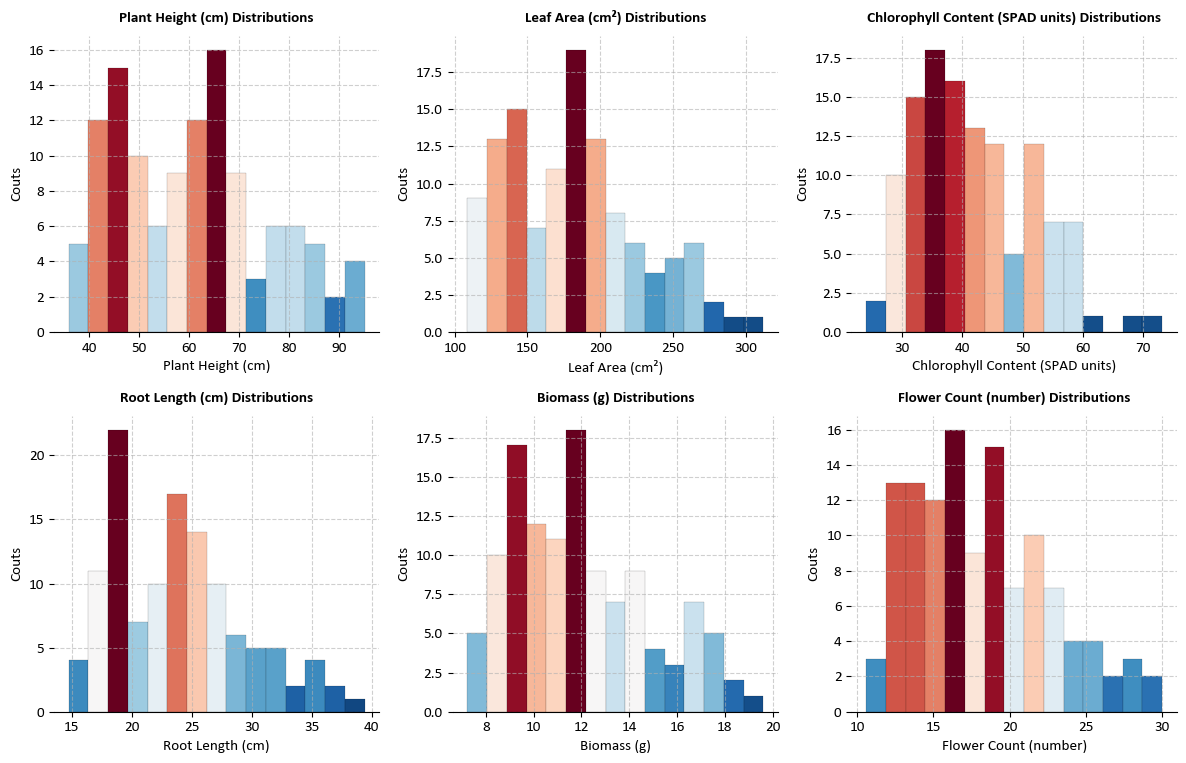

In [33]:
def visualize_histogram(df, Variables):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4* rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        n, bins, patches = axes[idx].hist(df[column], bins=15, edgecolor='k', linewidth=0.1, alpha=1)
        for i in range(len(patches)): patches[i].set_facecolor(plt.cm.RdBu_r(n[i] / max(n)))
        axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10, fontweight='bold')
        axes[idx].spines[['right', 'left', 'top']].set_visible(False)
        axes[idx].grid(linestyle='--', alpha=0.6)
        axes[idx].set_xlabel(column)
        axes[idx].set_ylabel('Couts')
    
    for idx in range(num_variables, len(axes)): fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

Variables = numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()[:6]
visualize_histogram(df, Variables)

<h4 style='font-family: Dalton White;  font-size: 25px; font-weight: 600'>5.2:  Kernel Density Estimation (KDE) plots</h4>

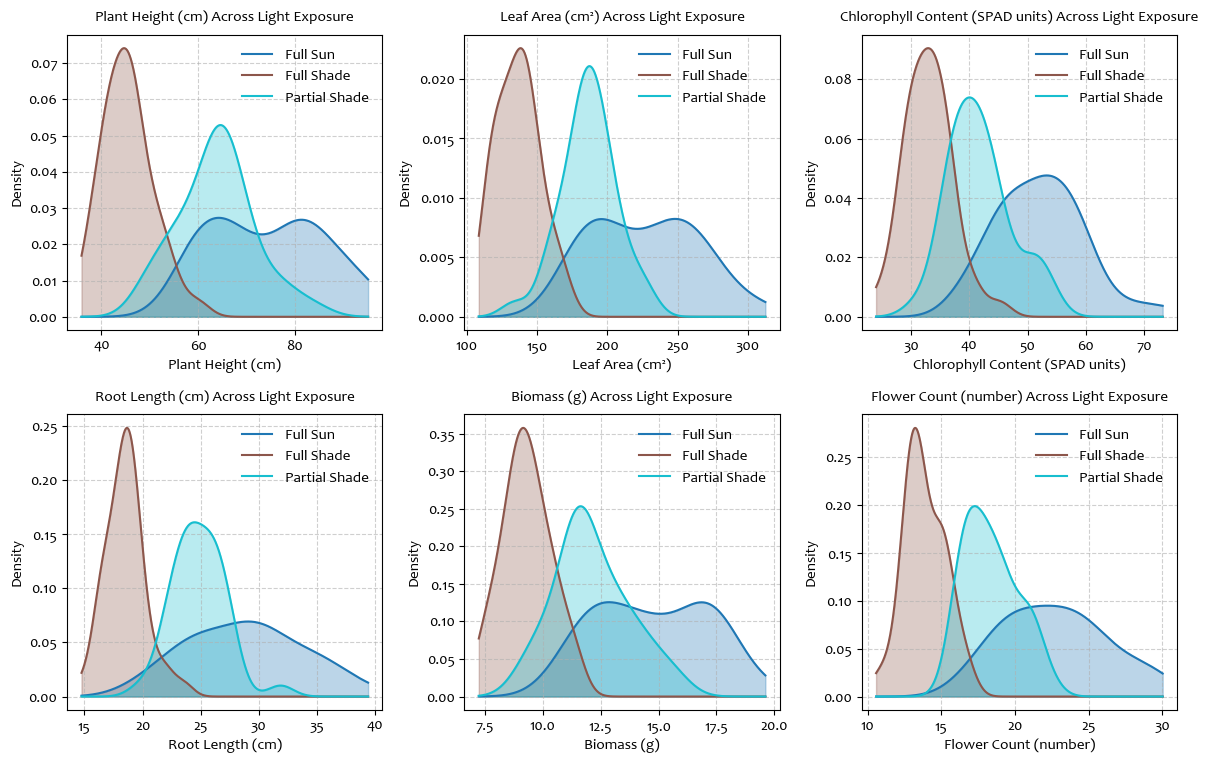

In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plot_kdeplot(df, variables, group_col=None, cmap="tab10"):
    num_variables = len(variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)

    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    plt.rcParams.update({'font.family': 'Candara', 'font.size': 11})
    axes = axes.flatten() if num_variables > 1 else [axes]

    # Handle groups and colors
    if group_col:
        categories = df[group_col].dropna().unique()
        cmap = plt.cm.get_cmap(cmap, len(categories))
        color_map = {cat: cmap(i) for i, cat in enumerate(categories)}
    else:
        categories, color_map = [None], {None: "steelblue"}

    for idx, column in enumerate(variables):
        x_range = np.linspace(df[column].min(), df[column].max(), 1000)
        for cat in categories:
            data = df[df[group_col] == cat][column] if group_col else df[column]
            if len(data) == 0:
                continue
            kde = gaussian_kde(data)
            axes[idx].plot(x_range, kde(x_range), label=str(cat), color=color_map[cat])
            axes[idx].fill_between(x_range, kde(x_range), alpha=0.3, color=color_map[cat])

        title = f"{column} Distribution" if not group_col else f"{column} Across {group_col}"
        axes[idx].set_title(title, fontsize=11, pad=10)
        #axes[idx].spines[['right', 'top']].set_visible(False)
        axes[idx].set_xlabel(column, fontsize=11)
        axes[idx].set_ylabel("Density", fontsize=11)
        axes[idx].grid(linestyle="--", alpha=0.6)
        if group_col:
            axes[idx].legend(frameon=False)

    # Remove empty subplots
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

if __name__ == "__main__":
    variables = df.select_dtypes(include=['number']).columns[:6]
    plot_kdeplot(df, variables, group_col='Light Exposure', cmap="tab10")

<h4 style='font-family: Dalton White; font-size: 25px; font-weight: 600'>5.3:  Barplot | Visual Comparisons</h4> 

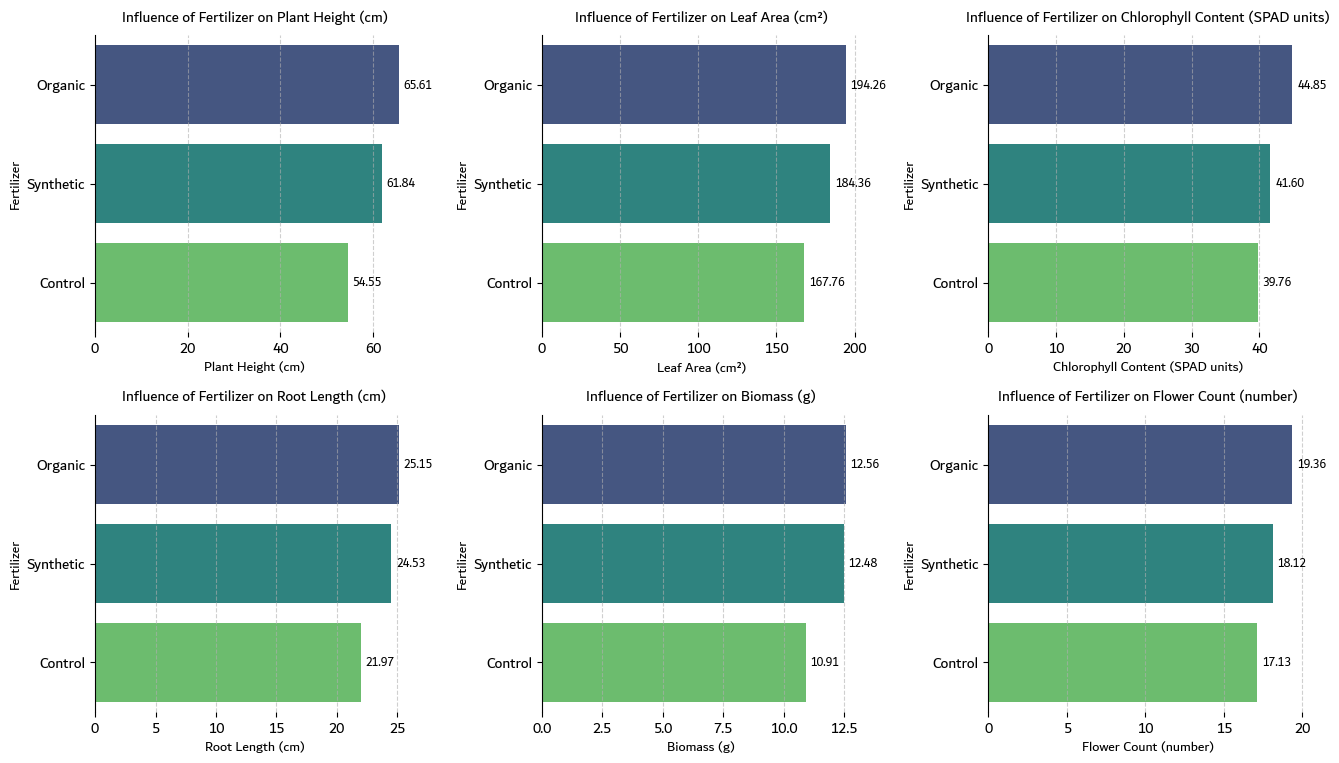

In [44]:
def plot_barplot(df, variables, group_col):
    num_variables = len(variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)

    fig, axes = plt.subplots(rows, cols, figsize=(4.5 * cols, 4 * rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.size': 11})
    axes = axes.flatten() if num_variables > 1 else [axes]

    for idx, column in enumerate(variables):
        data_sorted = (df.groupby(group_col)[column].mean().reset_index().sort_values(column, ascending=False))
        ax = axes[idx]
        sns.barplot(
            data=data_sorted, x=column, 
            y=group_col, order=data_sorted[group_col], 
            palette="viridis", ax=ax, errorbar=None)
        for p in ax.patches:
            ax.text(
                p.get_width() + (0.01 * df[column].max()),  # small offset
                p.get_y() + p.get_height() / 2,
                f"{p.get_width():.2f}",
                va="center", ha="left", fontsize=9, color="black"
            )

        sns.despine(ax=ax, right=True, bottom=True)
        ax.set_title(f"Influence of {group_col} on {column}", fontsize=11, pad=10)
        ax.set_xlabel(column, fontsize=10)
        ax.set_ylabel(group_col, fontsize=10)
        ax.grid(linestyle="--", alpha=0.6, axis="x")

    for idx in range(num_variables, len(axes)): fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

if __name__ == "__main__":
    variables = df.select_dtypes(include=[np.number]).columns[:6]
    plot_barplot(df, variables, group_col="Fertilizer")

<h4 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>5.4:  Boxplot | Visual Comparisons</h4> 

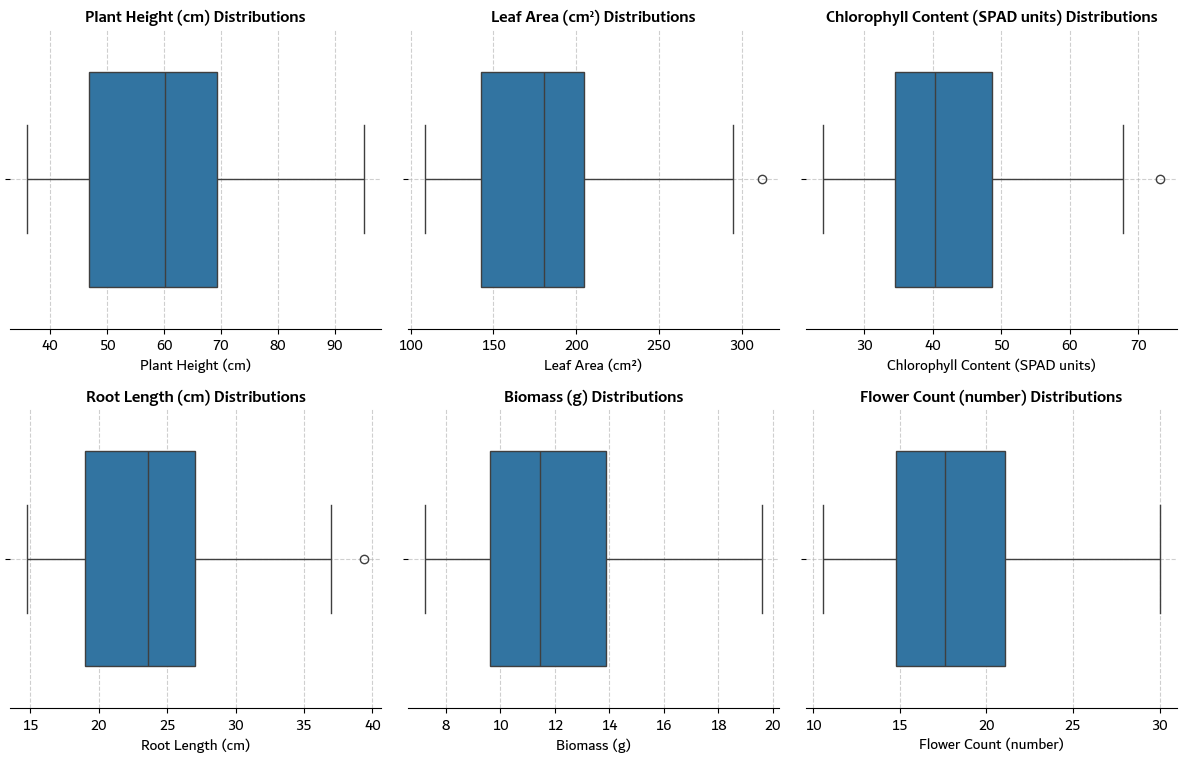

In [45]:
def visualize_boxplots(df: pd.DataFrame, group: str = None, num_cols: list=None):
    if num_cols is None:
        num_cols = df.select_dtypes(include=['number']).columns.tolist()[:6]
        if group in num_cols:
            num_cols.remove(group)
        
    num_variables = len(num_cols)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
    plt.rcParams.update({'font.family': 'Calibri', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(num_cols):
        if group is not None:
            sns.boxplot(data=df, x=df[column], fill=True, gap=0.1, ax=axes[idx], hue=group, palette='RdBu_r')  
            axes[idx].set_title(f"{column} Across {group}", fontsize=12, fontweight='bold', fontfamily='Candara')
            axes[idx].legend(frameon=False)
        else :
            sns.boxplot(data=df, x=df[column], fill=True, gap=0.1, ax=axes[idx],)
            axes[idx].set_title(f"{column} Distributions", fontsize=12, fontweight='bold', fontfamily='Candara')
            
        axes[idx].spines[['right', 'left', 'top']].set_visible(False)
        axes[idx].set_xlabel(column, fontsize=11)
        axes[idx].grid(linestyle='--', alpha=0.6)
    
    for idx in range(num_variables, len(axes)): fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
    return fig

fig = visualize_boxplots(df)

<h1 style='font-family: French Script MT; font-size: 30px;  font-weight: 600'>6.0: ANOVA Assumptions Validations</h1>

<h3 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>6.1: Homogeneity of Variance (Levene's Test)</h3>

In [42]:
def Levene_test(df, group_cols, numeric_cols=None): 
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
        for g in group_cols:
            if g in numeric_cols:
                numeric_cols.remove(g)
    
    results = []
    for group_col in group_cols:
        for col in numeric_cols:
            grouped_data = [g[col].dropna().values for _, g in df.groupby(group_col)]
            if all(len(g) > 1 for g in grouped_data):  # Ensure each group has enough data
                levene_stat, levene_p = levene(*grouped_data)
                interpretation = 'Homogeneous' if levene_p > 0.05 else 'Not Homogeneous'
                
            else:
                levene_stat, levene_p, interpretation = None, None, 'Insufficient data'
            
            results.append({
                'Group Column': group_col,
                'Variable': col,
                'Test Statistic': levene_stat,
                'P-Value': levene_p,
                'Interpretation': interpretation
            })
    
    return pd.DataFrame(results)

result_df = Levene_test(df, group_cols=['Fertilizer'])
display(result_df)

,Group Column,Variable,Test Statistic,P-Value,Interpretation
0,Fertilizer,Plant Height (cm),5.403,0.006,Not Homogeneous
1,Fertilizer,Leaf Area (cm²),7.774,0.001,Not Homogeneous
2,Fertilizer,Chlorophyll Content (SPAD units),3.918,0.023,Not Homogeneous
3,Fertilizer,Root Length (cm),4.071,0.020,Not Homogeneous
4,Fertilizer,Biomass (g),11.775,0.000,Not Homogeneous
5,Fertilizer,Flower Count (number),4.620,0.012,Not Homogeneous
6,Fertilizer,Seed Yield (g),3.205,0.044,Not Homogeneous
7,Fertilizer,Stomatal Conductance (mmol/m²/s),2.583,0.080,Homogeneous


<h3 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>6.2: Normality Test for Variables Samples (Shapiro Wilk Test)</h3>

In [43]:
def bootstrapping(df, column, num_samples=1000, sample_size=30):
    sample_means = []
    for _ in range(num_samples):
        sample = df[column].dropna().sample(n=sample_size, replace=True)
        sample_means.append(sample.mean())
    return sample_means

def shapiro_wilk_test(df, group_col, numeric_cols=None, use_bootstrap=True, num_samples=1000, sample_size=30): 
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
        if group_col in numeric_cols:
            numeric_cols.remove(group_col)
    
    results = []
    for group, group_df in df.groupby(group_col):
        for col in numeric_cols:
            if use_bootstrap:
                data = bootstrapping(group_df, col, num_samples=num_samples, sample_size=sample_size)
            else:
                data = group_df[col].dropna()
                
            if len(data) >= 3:  # Shapiro requires at least 3 values
                stat, p_value = shapiro(data)
                interpretation = 'Normal' if p_value > 0.05 else 'Not Normal'
            else:
                stat, p_value, interpretation = None, None, 'Insufficient data'
            
            results.append({
                'Main-Group': group_col,
                'Group': group,
                'Variable': col,
                'Test Statistic': stat,
                'P-Value': p_value,
                'Interpretation': interpretation,
                'Used Bootstrap': use_bootstrap
            })
        
    results_df = pd.DataFrame(results)
    return results_df

result_df = shapiro_wilk_test(df, group_col='Fertilizer', use_bootstrap=True)
display(result_df)

,Main-Group,Group,Variable,Test Statistic,P-Value,Interpretation,Used Bootstrap
0,Fertilizer,Control,Plant Height (cm),0.999,0.845,Normal,True
1,Fertilizer,Control,Leaf Area (cm²),0.998,0.177,Normal,True
2,Fertilizer,Control,Chlorophyll Content (SPAD units),0.998,0.294,Normal,True
3,Fertilizer,Control,Root Length (cm),0.999,0.937,Normal,True
4,Fertilizer,Control,Biomass (g),0.998,0.168,Normal,True
5,Fertilizer,Control,Flower Count (number),0.998,0.298,Normal,True
6,Fertilizer,Control,Seed Yield (g),0.998,0.179,Normal,True
7,Fertilizer,Control,Stomatal Conductance (mmol/m²/s),0.999,0.848,Normal,True
8,Fertilizer,Organic,Plant Height (cm),0.999,0.637,Normal,True
9,Fertilizer,Organic,Leaf Area (cm²),0.997,0.062,Normal,True


<h1 style='font-family: French Script MT; font-size: 30px; font-weight: 600'>7.0: Analysis of Varience (ANOVA)</h1>

<h3 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>7.1: One Way  Analysis of Varience</h3>

In [11]:
def rename(text): return re.sub(r'[^a-zA-Z]', "", text)
    
def One_way_anova(data, Metrics, group_cols):
    results = []
    original_group_cols = group_cols[:]  # Save original names for reporting
    group_cols = [rename(col) for col in group_cols]
    data = data.rename(columns={col: rename(col) for col in data.columns})
    
    for original_group, group in zip(original_group_cols, group_cols):
        for col in Metrics:
            column_name = rename(col)  
            formula = f"{column_name} ~ C({group})" 
            model = smf.ols(formula, data=data).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            
            for source, row in anova_table.iterrows():
                p_value = row["PR(>F)"]
                interpretation = "Significant" if p_value < 0.05 else "No significant"
                if source == "Residual":
                    interpretation = "-"
                
                results.append({
                    "Variable": col,
                    "Source": source,
                    "Sum Sq": row["sum_sq"],
                    "df": row["df"],
                    "F-Value": row["F"],
                    "p-Value": p_value,
                    "Interpretation": interpretation
                })

    return pd.DataFrame(results)

group_cols = ['Fertilizer']
Metrics = df.select_dtypes(include=[np.number]).columns.tolist()
Anova_results = One_way_anova(df, Metrics, group_cols)
Anova_results

,Variable,Source,Sum Sq,df,F-Value,p-Value,Interpretation
0,Plant Height (cm),C(Fertilizer),2540.40,2.00,6.20,0.00,Significant
1,Plant Height (cm),Residual,23984.47,117.00,NaN,NaN,-
2,Leaf Area (cm²),C(Fertilizer),14394.90,2.00,3.56,0.03,Significant
3,Leaf Area (cm²),Residual,236693.54,117.00,NaN,NaN,-
4,Chlorophyll Content (SPAD units),C(Fertilizer),529.81,2.00,2.81,0.06,No significant
5,Chlorophyll Content (SPAD units),Residual,11047.89,117.00,NaN,NaN,-
6,Root Length (cm),C(Fertilizer),229.57,2.00,4.09,0.02,Significant
7,Root Length (cm),Residual,3286.71,117.00,NaN,NaN,-
8,Biomass (g),C(Fertilizer),70.05,2.00,4.45,0.01,Significant
9,Biomass (g),Residual,921.36,117.00,NaN,NaN,-


<h3 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>7.2: Two Way  Analysis of Varience</h3>

In [46]:
def clean_column_name(name): return re.sub(r'[^a-zA-Z]', '', name)

def compute_two_way_anova(df, numeric_vars, group1, group2):
    results = []

    df = df.rename(columns={col: clean_column_name(col) for col in df.columns})
    group1_clean = clean_column_name(group1)
    group2_clean = clean_column_name(group2)

    for var in numeric_vars:
        var_clean = clean_column_name(var)
        formula = f"{var_clean} ~ C({group1_clean}) * C({group2_clean})"

        try:
            model = smf.ols(formula, data=df).fit()
            anova_table = anova_lm(model, typ=2)
            for source, row in anova_table.iterrows():
                p_val = row["PR(>F)"]
                interpretation = "Significant" if p_val < 0.05 else "Not Significant"
                if source == "Residual":
                    interpretation = "-"

                results.append({
                    "Variable": var,
                    "Source": source,
                    "Sum Sq": row["sum_sq"],
                    "df": row["df"],
                    "F-Value": row["F"],
                    "p-Value": p_val,
                    "Significant (α<0.05)": interpretation
                })
        
        except Exception as e:
            print(f"ANOVA failed for variable '{var}': {e}")
    results = pd.DataFrame(results)
    return results.fillna(' ')

numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
anova_results = compute_two_way_anova(df, numeric_vars, group1 = 'Fertilizer', group2='Light Exposure')
display(anova_results)

,Variable,Source,Sum Sq,df,F-Value,p-Value,Significant (α<0.05)
0,Plant Height (cm),C(Fertilizer),3092.829,2.000,48.502,0.000,Significant
1,Plant Height (cm),C(LightExposure),18697.924,2.000,293.223,0.000,Significant
2,Plant Height (cm),C(Fertilizer):C(LightExposure),1747.481,4.000,13.702,0.000,Significant
3,Plant Height (cm),Residual,3539.065,111.000,,,-
4,Leaf Area (cm²),C(Fertilizer),19516.698,2.000,35.591,0.000,Significant
5,Leaf Area (cm²),C(LightExposure),177708.337,2.000,324.076,0.000,Significant
6,Leaf Area (cm²),C(Fertilizer):C(LightExposure),28551.539,4.000,26.034,0.000,Significant
7,Leaf Area (cm²),Residual,30433.665,111.000,,,-
8,Chlorophyll Content (SPAD units),C(Fertilizer),772.907,2.000,18.855,0.000,Significant
9,Chlorophyll Content (SPAD units),C(LightExposure),7926.072,2.000,193.359,0.000,Significant


<h2 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>7.3: Model Residual Diagonistic</h2>

**Normality of Residual Using Shapiro Wilk Test**

In [64]:
def shapiro_wilk_test(dataframe, variables, group_column):
    if len(variables) == 0: raise ValueError("No numerical columns provided for testing.")
    
    renamed_columns = {col: rename(col) for col in dataframe.columns}
    dataframe = dataframe.rename(columns=renamed_columns)
    renamed_group_column = rename(group_column)

    test_results = []
    for original_col in variables:
        renamed_col = rename(original_col)
        formula = f"{renamed_col} ~ C({renamed_group_column})"
        model = smf.ols(formula, data=dataframe).fit()
        residuals = model.resid

        stat, p_value = shapiro(residuals)
        test_results.append({
            'Group': group_column,
            'Variable': original_col,
            'Statistic': stat,
            'P-Value': p_value,
            'Normality': 'Normally Distributed' if p_value > 0.05 else 'Not Normally Distributed'
        })

    results_df = pd.DataFrame(test_results)
    return results_df

Variables = df.select_dtypes(include=[np.number]).columns
results = shapiro_wilk_test(df, Variables, group_column='Fertilizer')
display(results)

,Group,Variable,Statistic,P-Value,Normality
0,Fertilizer,Plant Height (cm),0.958,0.001,Not Normally Distributed
1,Fertilizer,Leaf Area (cm²),0.968,0.006,Not Normally Distributed
2,Fertilizer,Chlorophyll Content (SPAD units),0.964,0.003,Not Normally Distributed
3,Fertilizer,Root Length (cm),0.967,0.005,Not Normally Distributed
4,Fertilizer,Biomass (g),0.979,0.062,Normally Distributed
5,Fertilizer,Flower Count (number),0.962,0.002,Not Normally Distributed
6,Fertilizer,Seed Yield (g),0.969,0.007,Not Normally Distributed
7,Fertilizer,Stomatal Conductance (mmol/m²/s),0.970,0.008,Not Normally Distributed


**Normality of Residual Using Q-Q plot**

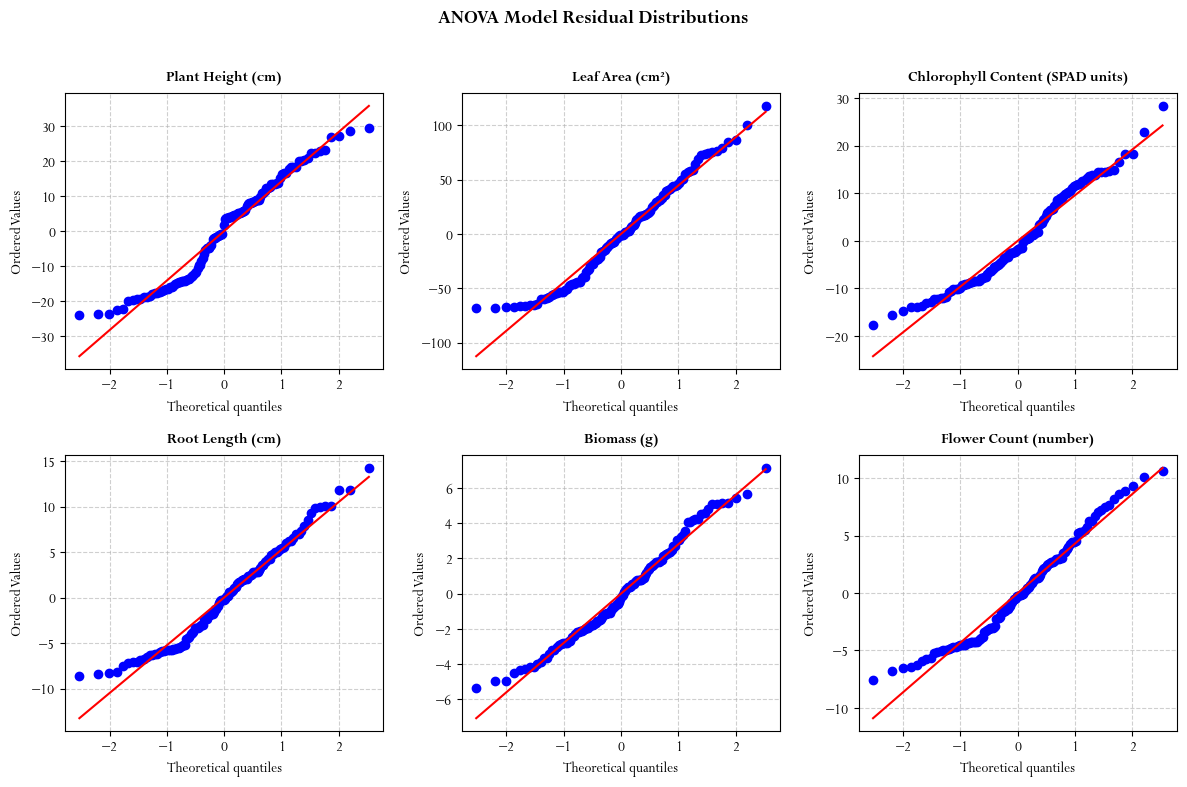

In [63]:
def residual_qqplot(data, Variables, group_col):
    renamed_group_col = rename(group_col)
    data = data.rename(columns={col: rename(col) for col in data.columns})
    
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4* rows))
    plt.rcParams.update({'font.family': 'Perpetua', 'font.style': 'normal', 'font.size': 11 })
    fig.suptitle("ANOVA Model Residual Distributions", fontsize=14, fontweight='bold')
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        ax = axes[idx]
        column_name = rename(column)  
        formula = f"{column_name} ~ C({renamed_group_col})" 
        model = smf.ols(formula, data=data).fit()
        #sm. qqplot(model.resid, line='s', ax=ax)
        stats.probplot(model.resid, dist="norm", plot=ax)
        axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10, fontweight='bold')
        if group_col: axes[idx].set_title(f"{column}", fontsize=11, pad=10, fontweight='bold')
        axes[idx].grid(linestyle='--', alpha=0.6)
    
    for idx in range(num_variables, len(axes)): fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
Variables = df.select_dtypes(include=[np.number]).columns[:6]
residual_qqplot(df, Variables, group_col='Fertilizer')

<h1 style='font-family: French Script MT; font-size: 30px; font-weight: 600'>8.0: Post-Hoc Analysis</h1>

<h2 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>8.1: Tukey's Honest Significant Difference (THSD)</h2>

In [66]:
def Tukey_hsd(df, Variables, group=''):
    results_data = []
    for metric in Variables:
        turkey_results = pairwise_tukeyhsd(endog=df[metric], groups=df[group], alpha=0.05)
        results_table = turkey_results.summary()
        
        for i in range(1, len(results_table)):
            row = results_table.data[i]
            results_data.append({
                'Metric': metric,
                'Group1': row[0],
                'Group2': row[1],
                'Mean Diff.': row[2],
                'P-Value': row[3],
                'Lower CI': row[4],
                'Upper CI': row[5],
                'Reject Null': row[6]
            })
        
        result_df = pd.DataFrame(results_data)
    return result_df


Variables = df.select_dtypes(include=[np.number]).columns.tolist()
results = Tukey_hsd(df, Variables, group='Fertilizer')
pd.set_option("display.float_format", "{:.3f}".format)
results

,Metric,Group1,Group2,Mean Diff.,P-Value,Lower CI,Upper CI,Reject Null
0,Plant Height (cm),Control,Organic,11.060,0.002,3.458,18.663,True
1,Plant Height (cm),Control,Synthetic,7.283,0.061,-0.271,14.837,False
2,Plant Height (cm),Organic,Synthetic,-3.777,0.472,-11.426,3.872,False
3,Leaf Area (cm²),Control,Organic,26.497,0.026,2.614,50.380,True
4,Leaf Area (cm²),Control,Synthetic,16.602,0.225,-7.127,40.331,False
5,Leaf Area (cm²),Organic,Synthetic,-9.895,0.593,-33.923,14.133,False
6,Chlorophyll Content (SPAD units),Control,Organic,5.094,0.054,-0.065,10.254,False
7,Chlorophyll Content (SPAD units),Control,Synthetic,1.839,0.672,-3.287,6.966,False
8,Chlorophyll Content (SPAD units),Organic,Synthetic,-3.255,0.300,-8.446,1.936,False
9,Root Length (cm),Control,Organic,3.183,0.022,0.369,5.998,True


<h2 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>8.2: Tukey's Honest Significant Difference (THSD) Results Visualization</h2>

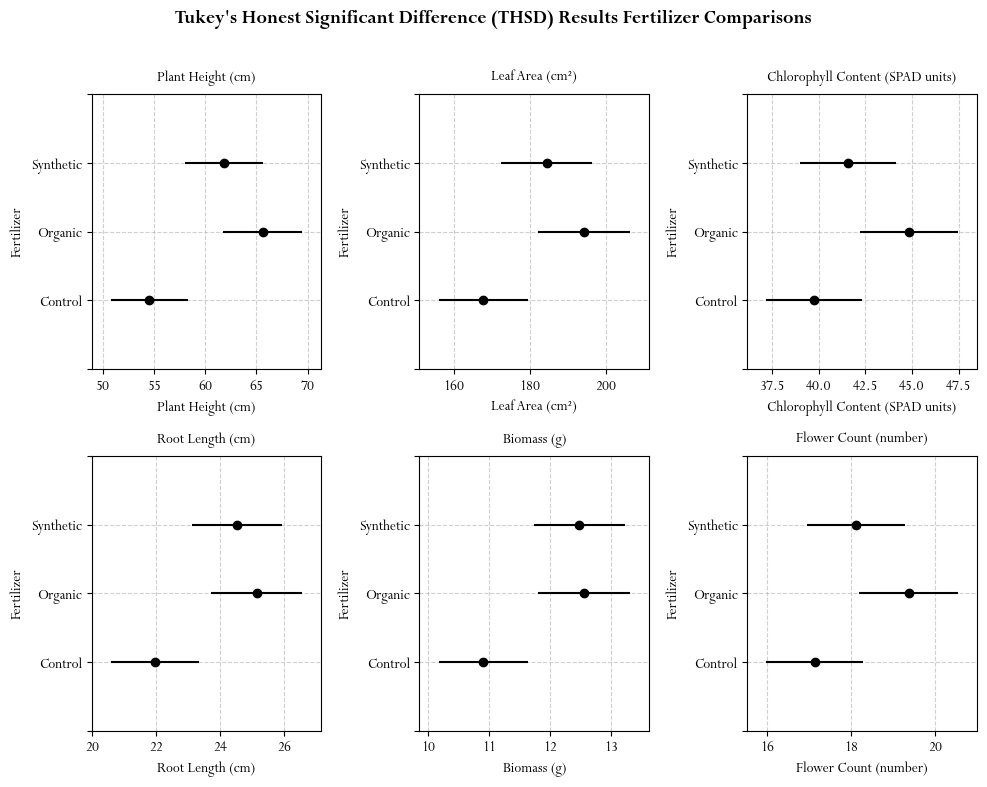

In [50]:
def tukey_hsd_plot(df, Variables, group_col):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 6* rows))
    plt.rcParams.update({'font.family': 'Perpetua', 'font.style': 'normal', 'font.size': 11 })
    fig.suptitle(F"Tukey's Honest Significant Difference (THSD) Results {group_col} Comparisons", fontsize=14, fontweight='bold')
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        tukey_result = pairwise_tukeyhsd(df[column], df[group_col], alpha=0.05)
        tukey_result.plot_simultaneous(figsize=(10,8), ylabel=group_col, xlabel=column, ax=axes[idx])
        axes[idx].set_title(f"{column}", fontsize=11, pad=10)
        axes[idx].grid(linestyle='--', alpha=0.6)
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
Variables = df.select_dtypes(include=[np.number]).columns[:6]
tukey_hsd_plot(df, Variables, group_col='Fertilizer')

<h2 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>8.3: Compact Letter Display (CLD) Table</h2>

In [16]:
def letters(df, alpha=0.05):
    df["p-adj"] = df["p-adj"].astype(float)
    group1 = set(df.group1.tolist())
    group2 = set(df.group2.tolist())
    groupSet = group1 | group2
    groups = list(groupSet)
    letters = list(string.ascii_lowercase)[:len(groups)]
    cldgroups = letters
    cld = pd.DataFrame(list(zip(groups, letters, cldgroups)))
    cld[3] = ""
    
    for row in df.itertuples():
        if df["p-adj"][row[0]] > alpha:
            cld.loc[groups.index(df["group1"][row[0]]), 2] += cld.loc[groups.index(df["group2"][row[0]]), 1]
            cld.loc[groups.index(df["group2"][row[0]]), 2] += cld.loc[groups.index(df["group1"][row[0]]), 1]
        if df["p-adj"][row[0]] < alpha:
            cld.loc[groups.index(df["group1"][row[0]]), 3] += cld.loc[groups.index(df["group2"][row[0]]), 1]
            cld.loc[groups.index(df["group2"][row[0]]), 3] += cld.loc[groups.index(df["group1"][row[0]]), 1]
    
    cld[2] = cld[2].apply(lambda x: "".join(sorted(x)))
    cld[3] = cld[3].apply(lambda x: "".join(sorted(x)))
    cld.rename(columns={0: "groups"}, inplace=True)
    cld = cld.sort_values(cld.columns[2], key=lambda x: x.str.len())
    cld["labels"] = ""
    letters = list(string.ascii_lowercase)
    unique = []
    
    for item in cld[2]:
        for fitem in cld["labels"].unique():
            for c in range(len(fitem)):
                if not set(unique).issuperset(set(fitem[c])):
                    unique.append(fitem[c])
        g = len(unique)
        for kitem in cld[1]:
            if kitem in item:
                if cld.loc[cld[1] == kitem, "labels"].iloc[0] == "":
                    cld.loc[cld[1] == kitem, "labels"] += letters[g]
                if kitem in " ".join(cld.loc[cld["labels"] == letters[g], 3]):
                    g = len(unique) + 1
                if len(set(cld.loc[cld[1] == kitem, "labels"].iloc[0]).intersection(cld.loc[cld[2] == item, "labels"].iloc[0])) <= 0:
                    if letters[g] not in list(cld.loc[cld[1] == kitem, "labels"].iloc[0]):
                        cld.loc[cld[1] == kitem, "labels"] += letters[g]
                    if letters[g] not in list(cld.loc[cld[2] == item, "labels"].iloc[0]):
                        cld.loc[cld[2] == item, "labels"] += letters[g]
    
    cld = cld.sort_values("labels")
    cld.drop(columns=[1, 2, 3], inplace=True)
    cld = dict(zip(cld["groups"], cld["labels"]))
    return cld

In [17]:
def Compact_letters_display(df, Factor='', exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    def calculate_stats_for_column(col_name):
        model = smf_ols(f'{col_name}~C({Factor})', data=df).fit()
        anova_results = anova_lm(model)
        p_value = anova_results.loc[f'C({Factor})', 'PR(>F)']
        tukey = pairwise_tukeyhsd(df[col_name], df[Factor])
        Turkey_results = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        group_labels = letters(Turkey_results)
        stats = df.groupby(Factor)[col_name].agg(['mean', 'sem']).round(2)
        stats['letter'] = stats.index.map(group_labels)
        stats['formatted'] = stats.apply(
            lambda x: f"{x['mean']:.2f} ± {x['sem']:.2f} {x['letter']}", axis=1)
        
        return stats['formatted'], p_value
    results = {}
    p_values = {}
    for col in numeric_cols:
        results[col], p_values[col] = calculate_stats_for_column(col)
    
    results_df = pd.DataFrame(results)
    results_df.index.name = Factor
    p_values_formatted = {col: f"{p:.4f}" + ('***' if p <= 0.001 else '**' if p <= 0.01 else '*' if p <= 0.05 else 'ns') 
                         for col, p in p_values.items()}
    p_value_df = pd.DataFrame([p_values_formatted], index=['p-value'])
    final_results = pd.concat([results_df, p_value_df])
    return final_results


def compact_letter_table(df, group, savepath=None):
    data = df.copy()
    group_col = rename(group)
    data.columns = data.columns.to_series().apply(rename)
    results_df = Compact_letters_display(data, Factor=group_col)
    results_df_columns = df.select_dtypes(include=[np.number]).columns
    results_df.columns = results_df_columns
    return results_df

In [20]:
results = compact_letter_table(df, group='Fertilizer')
results.T

,Control,Organic,Synthetic,p-value
Plant Height (cm),54.55 ± 1.58 b,65.61 ± 2.69 a,61.84 ± 2.42 ab,0.0028**
Leaf Area (cm²),167.76 ± 4.32 b,194.26 ± 8.37 a,184.36 ± 8.09 ab,0.0316*
Chlorophyll Content (SPAD units),39.76 ± 1.12 a,44.85 ± 1.77 a,41.60 ± 1.67 a,0.0646ns
Root Length (cm),21.97 ± 0.58 b,25.15 ± 1.03 a,24.53 ± 0.86 ab,0.0193*
Biomass (g),10.91 ± 0.26 a,12.56 ± 0.47 b,12.48 ± 0.56 b,0.0137*
Flower Count (number),17.13 ± 0.48 a,19.36 ± 0.82 a,18.12 ± 0.75 a,0.0766ns
Seed Yield (g),5.68 ± 0.17 a,6.41 ± 0.26 a,6.43 ± 0.25 a,0.0339*
Stomatal Conductance (mmol/m²/s),221.38 ± 6.67 b,256.74 ± 9.06 a,247.81 ± 9.74 ab,0.0113*


In [22]:
results = compact_letter_table(df, group='Light Exposure')
results.T

,Full Shade,Full Sun,Partial Shade,p-value
Plant Height (cm),45.39 ± 0.78 b,74.39 ± 1.81 a,63.78 ± 1.30 c,0.0000***
Leaf Area (cm²),136.79 ± 2.32 b,227.23 ± 5.95 a,186.68 ± 3.22 c,0.0000***
Chlorophyll Content (SPAD units),33.02 ± 0.62 b,52.17 ± 1.18 a,41.76 ± 0.88 c,0.0000***
Root Length (cm),18.52 ± 0.26 b,28.84 ± 0.77 a,24.84 ± 0.37 c,0.0000***
Biomass (g),9.29 ± 0.16 b,14.77 ± 0.38 a,12.12 ± 0.27 c,0.0000***
Flower Count (number),13.86 ± 0.21 b,22.76 ± 0.55 a,18.39 ± 0.30 c,0.0000***
Seed Yield (g),4.68 ± 0.07 b,7.66 ± 0.18 a,6.32 ± 0.11 c,0.0000***
Stomatal Conductance (mmol/m²/s),187.67 ± 3.29 b,294.33 ± 7.03 a,249.19 ± 4.95 c,0.0000***


<h2 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>8.4: Compact Letter Display (CLD) Visualization</h2>

In [32]:
def compact_letters_plot(df, numerical_columns: list, group_column: str, ncols: int = 3, title: str = None):
    num_variables = len(numerical_columns)
    cols = min(num_variables, ncols)
    rows = math.ceil(num_variables / cols)

    if num_variables == 1: fig, axes = plt.subplots(figsize=(9, 7))
    else : fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))

    plt.rcParams.update({'font.family': 'Corbel', 'font.style': 'normal', 'font.size': 12 })
    if num_variables > 1 and title : 
        fig.suptitle(title, fontsize=12, fontweight="bold")
    elif num_variables > 1  and title == None: 
        fig.suptitle(f"Influence of {group_column} on Variables", fontsize=12, fontweight="bold")
    
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, col in enumerate(numerical_columns):
        Turkey = pairwise_tukeyhsd(df[col], groups=df[group_column])
        Turkeyresults = pd.DataFrame(data=Turkey._results_table.data[1:], columns=Turkey._results_table.data[0])
        group_labels = letters(Turkeyresults)
        Aggregate_df = df.groupby(group_column)[col].agg(["mean", "sem"]).reset_index()
        ax = axes[idx]

        error = np.full(len(Aggregate_df), Aggregate_df["sem"])
        colors = plt.cm.rainbow_r(np.linspace(0, 1, len(Aggregate_df)))
        bars = ax.bar(Aggregate_df[group_column], Aggregate_df["mean"], yerr=error, color=colors, capsize=5)
        for bar, Letters in zip(bars, Aggregate_df[group_column]):
            height = bar.get_height()
            offset = height * 0.02
            ax.annotate(group_labels[Letters],
                        xy=(bar.get_x() + bar.get_width() / 2, height + offset),
                        xytext=(9, 0),
                        textcoords="offset points",
                        ha="center", va="bottom", fontsize=12, fontweight="bold")
    
        ax.set_xticks(range(len(Aggregate_df[group_column])))
        ax.set_xticklabels(Aggregate_df[group_column], rotation=0, ha="center", fontsize=10)
        ax.set_title(f"{col} Across {group_column.title()}", fontsize=11, pad=10, fontweight='bold')
        ax.set_xlabel(group_column, fontsize=10, fontweight='bold')
        ax.set_ylabel(col, fontsize=10, fontweight='bold')
        ax.grid(linestyle="--", alpha=0.3, color='pink')
    
    for idx in range(num_variables, len(axes)): fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    return fig

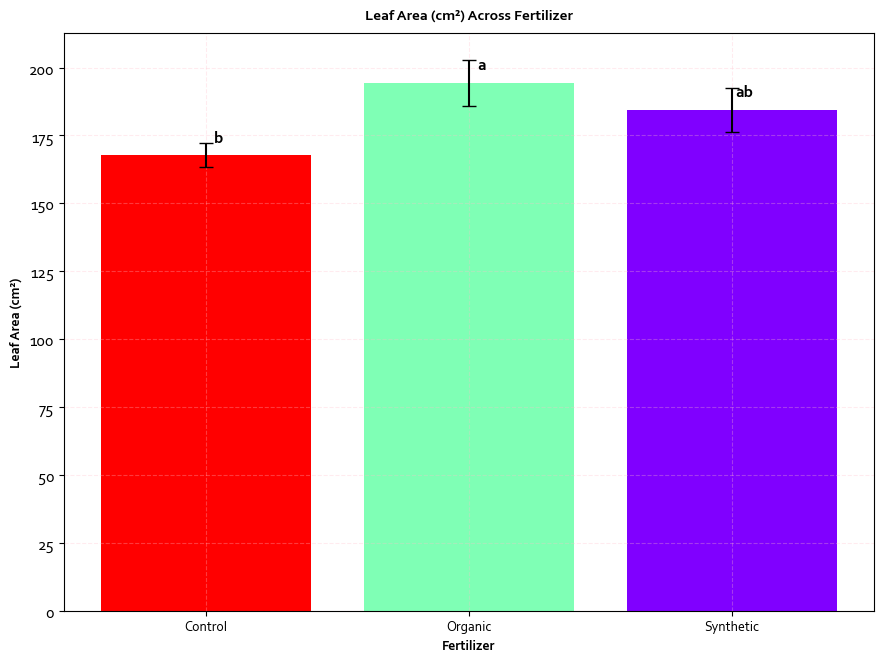

In [36]:
Variable = ['Leaf Area (cm²)']
fig = compact_letters_plot(df, Variable,  group_column='Fertilizer')

**Visualize multiple variables in a grid plots**

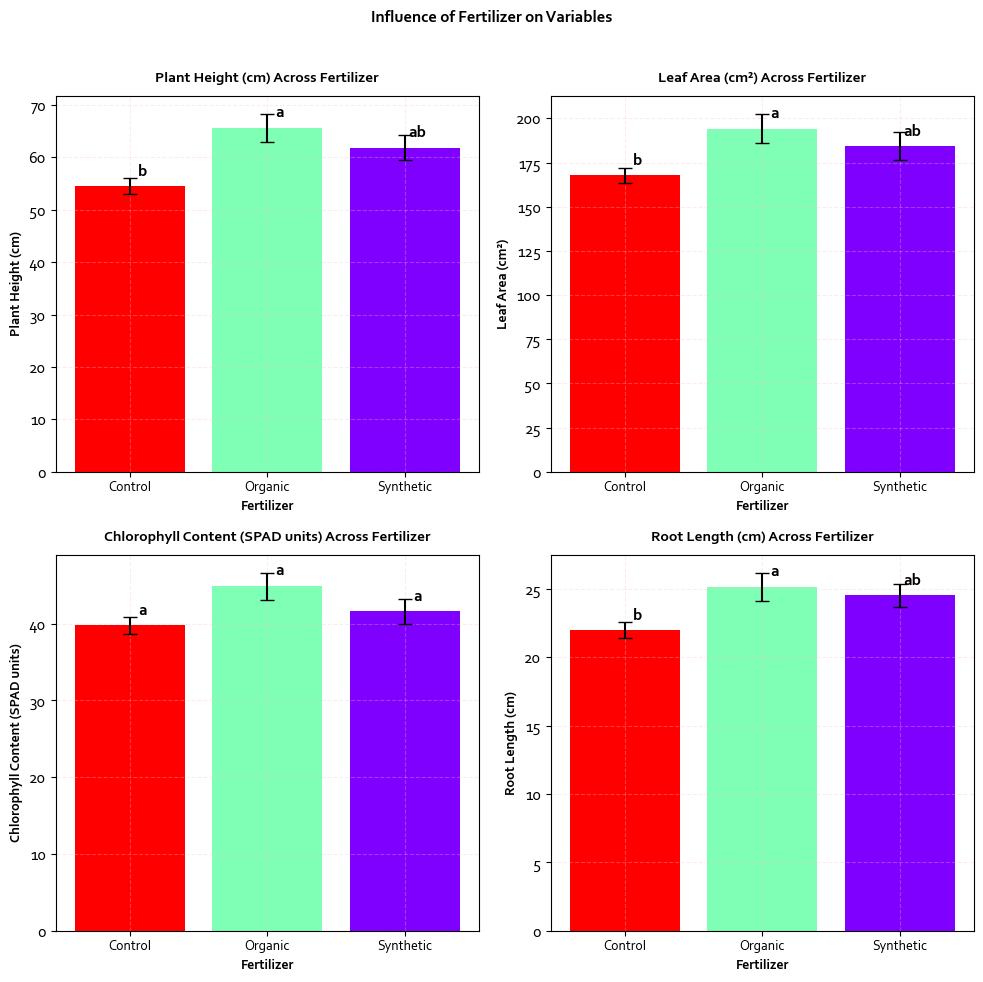

In [38]:
Variables = df.select_dtypes(include=[np.number]).columns.tolist()[:4] # Lists of Variable
fig = compact_letters_plot(df, Variables, ncols = 2, group_column='Fertilizer')

<h1 style='font-size: 35px; color: red; font-family: French Script MT; font-weight: 700; text-align: center'>Data to Drive Meaningful Insights and Solutions</h1>